In [1]:
# code for making a box and whisker plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv('/home/dices/Research/GWlensing_Brian/src_pos_for_dist_with_z_de+mcmc.csv')

dz=abs(data['z']-data['localized_z'])
#print(dz)
# add the dz column to the dataframe
data['dz'] = dz.round(12)
# calculate dA by dxdy
dx = abs(data['x'] - data['localized_x'])
dy = abs(data['y'] - data['localized_y'])
data['dx'] = dx.round(12)
data['dy'] = dy.round(12)
data['dS'] = np.sqrt(dx**2 + dy**2).round(12)
# Print the dataframe with 12 decimal places
print(data)
# save the dataframe in original file
#data.to_csv('/home/dices/Research/GWlensing_Brian/src_pos_for_dist_with_z_de+mcmc.csv', index=False)

   indices        x       y      z  localized_index  localized_x  localized_y  \
0   0.0000  87.3000 73.4000 2.9200           0.0000      87.3012      73.3936   
1   1.0000  67.5000 81.0000 3.0000           1.0000      67.4834      80.9732   
2   2.0000 110.9000 88.7000 3.1000           2.0000     110.2000      90.0600   
3   4.0000  80.1000 99.9000 3.3000           4.0000      79.0200      98.9400   
4   3.0000  72.4000 57.2000 2.9000           5.0000      77.3300      70.2400   
5   3.0000  71.3000 56.9000 3.4400           3.0000      71.2400      56.6800   

   localized_z  localized_chi_sq     dz     dx      dy      dS  
0       2.9126            0.0031 0.0074 0.0012  0.0064  0.0065  
1       2.9797            0.0001 0.0203 0.0166  0.0268  0.0315  
2       3.1800            0.0115 0.0800 0.7000  1.3600  1.5296  
3       3.2300            0.2081 0.0700 1.0800  0.9600  1.4450  
4       1.9500            0.0003 0.9500 4.9300 13.0400 13.9408  
5       3.4800            0.0028 0.0400 0.

In [ ]:
data_zH0 = pd.read_csv('/home/dices/Research/GWlensing_Brian/src_pos_with_z_H0_de+mcmc.csv')

dz=abs(data_zH0['z']-data_zH0['localized_z'])
dH0=abs(data_zH0['H0']-data_zH0['localized_H0'])
#print(dz)

# calculate dA by dxdy
dx = abs(data_zH0['x'] - data_zH0['localized_x'])
dy = abs(data_zH0['y'] - data_zH0['localized_y'])

data_zH0['dx'] = dx.round(12)
data_zH0['dy'] = dy.round(12)
data_zH0['dz'] = dz.round(12)
data_zH0['dH0'] = dH0.round(12)
data_zH0['dS'] = np.sqrt(dx**2 + dy**2).round(12)
# Print the dataframe with 10 decimal places
print(data_zH0)
# save the dataframe in original file
data_zH0.to_csv('/home/dices/Research/GWlensing_Brian/src_pos_for_dist_with_z_H0_de+mcmc.csv', index=False)

    indices           x          y     z    H0  localized_index  localized_x  \
0       2.0  110.900000  88.700000  3.10  70.0              2.0       110.26   
1       4.0   80.100000  99.900000  3.30  65.0              4.0        79.29   
2       3.0   72.400000  57.200000  2.90  73.0              3.0        72.17   
3       3.0   71.300000  56.900000  3.44  79.5              3.0        71.16   
4       5.0   75.400000  69.200000  3.40  66.0              5.0        75.86   
5       1.0   70.000000  75.000000  3.12  74.1              1.0        69.36   
6       4.0   80.020000  99.700000  3.12  80.3              4.0        79.15   
7       2.0  107.000000  89.000000  2.65  66.0              2.0       108.93   
8       3.0   56.000000  71.300000  3.60  78.0              3.0        72.65   
9       0.0   82.400000  75.600000  2.72  78.0              0.0        82.52   
10      5.0   77.600000  67.500000  3.34  82.0              5.0        77.27   
11      2.0  110.000000  88.600000  3.54

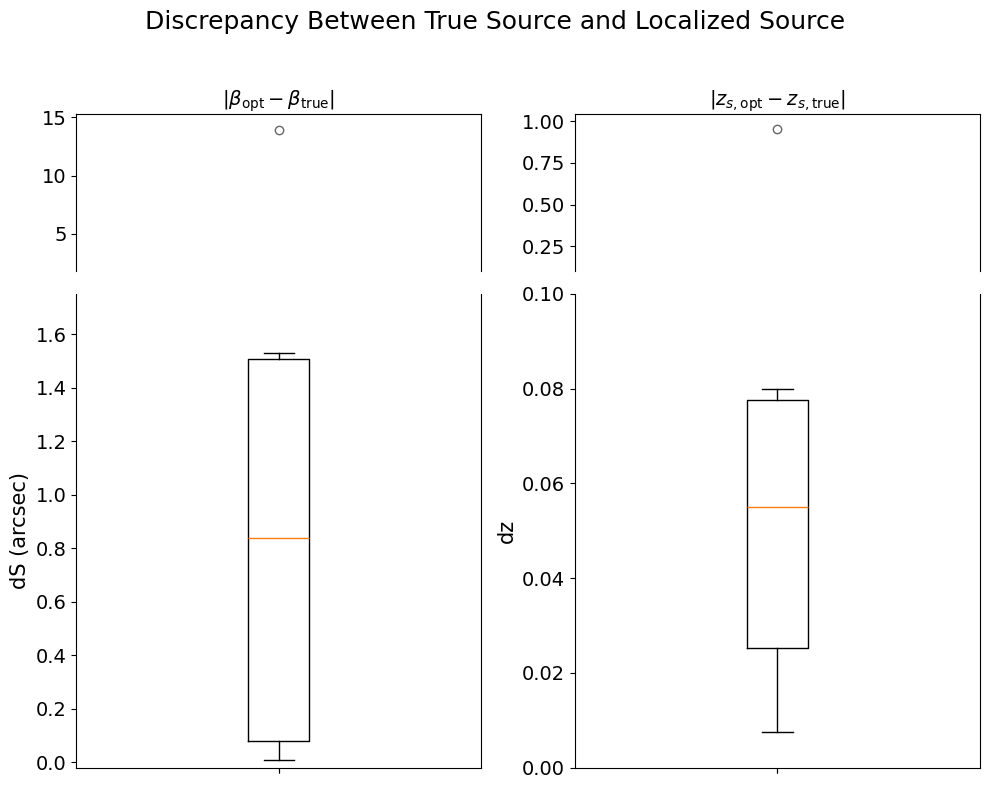

In [113]:
# your data
dS = data['dS']
dz = data['dz']

# choose strict break points:
break_s = 1.75    # break at 3 arcsec
break_z = 0.1   # break at 0.08 in dz

# how big the little diagonal ticks are
d = 0.015  

fig, ((ax_s_hi, ax_z_hi),
      (ax_s_lo, ax_z_lo)) = plt.subplots(
    2, 2,
    sharex='col',
    figsize=(10, 8),
    gridspec_kw={'height_ratios': [1, 3]}
)
fig.suptitle('Discrepancy Between True Source and Localized Source', fontsize=18)

# — Upper row: only the outlier region —
for ax, vals, brk, title in [
    (ax_s_hi, dS, break_s, r'$|\beta_{\rm opt}-\beta_{\rm true}|$'),
    (ax_z_hi, dz, break_z, r'$|z_{s,\rm opt}-z_{s,\rm true}|$'),
]:
    ax.boxplot(vals, showfliers=True,
               flierprops=dict(marker='o', alpha=0.6))
    ax.set_ylim(brk * 1.01, vals.max() * 1.1)
    ax.set_title(title, fontsize=14)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False, labelsize=14)

# — Lower row: the main bulk —
ax_s_lo.boxplot(dS, showfliers=True,
                flierprops=dict(marker='o', alpha=0.6))
ax_s_lo.set_ylim(-0.02, break_s)
ax_s_lo.spines['top'].set_visible(False)
ax_s_lo.set_ylabel('dS (arcsec)', fontsize=15)
ax_s_lo.tick_params(labelsize=14)
ax_s_lo.tick_params(labelbottom=False)

ax_z_lo.boxplot(dz, showfliers=True,
                flierprops=dict(marker='o', alpha=0.6))
ax_z_lo.set_ylim(0, break_z)
ax_z_lo.spines['top'].set_visible(False)
ax_z_lo.set_ylabel('dz', fontsize=15)
ax_z_lo.tick_params(labelsize=14)
ax_z_lo.tick_params(labelbottom=False)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


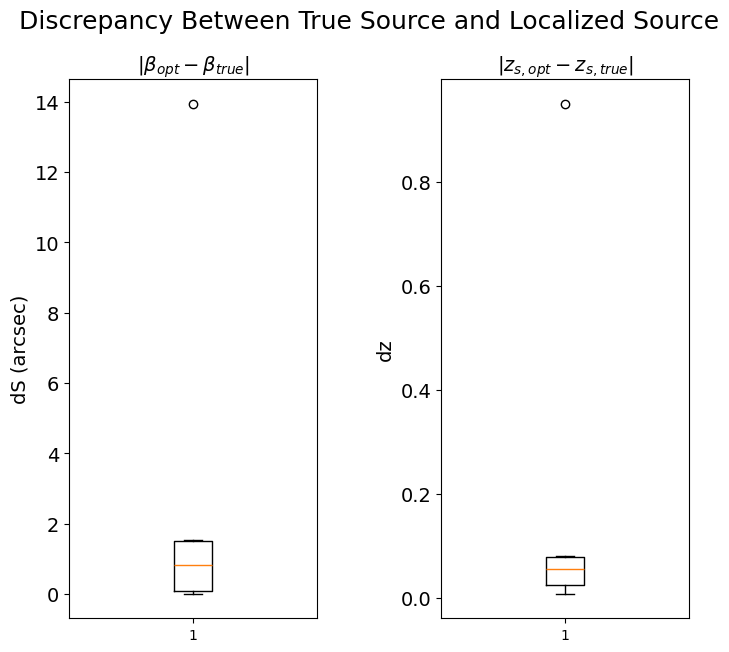

In [87]:
# create box and whisker plot for fixed H0 data
d_1 = data['dS']
d_2 = data['dz']

fig, axes = plt.subplots(1,2, figsize=(8, 7))
fig.suptitle('Discrepancy Between True Source and Localized Source', fontsize=18)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = axes[0]
ax1.boxplot(d_1)
ax1.set_ylabel('dS (arcsec)', fontsize = 14)
ax1.set_title('$|β_{opt} - β_{true}|$', fontsize = 14)

ax1.tick_params(axis='y', labelsize=14)

ax2 = axes[1]
ax2.boxplot(d_2)
ax2.set_ylabel('dz', fontsize = 14)
ax2.set_title('$|z_{s,opt} - z_{s,true}|$', fontsize = 14)

ax2.tick_params(axis='y', labelsize=14)

plt.show()

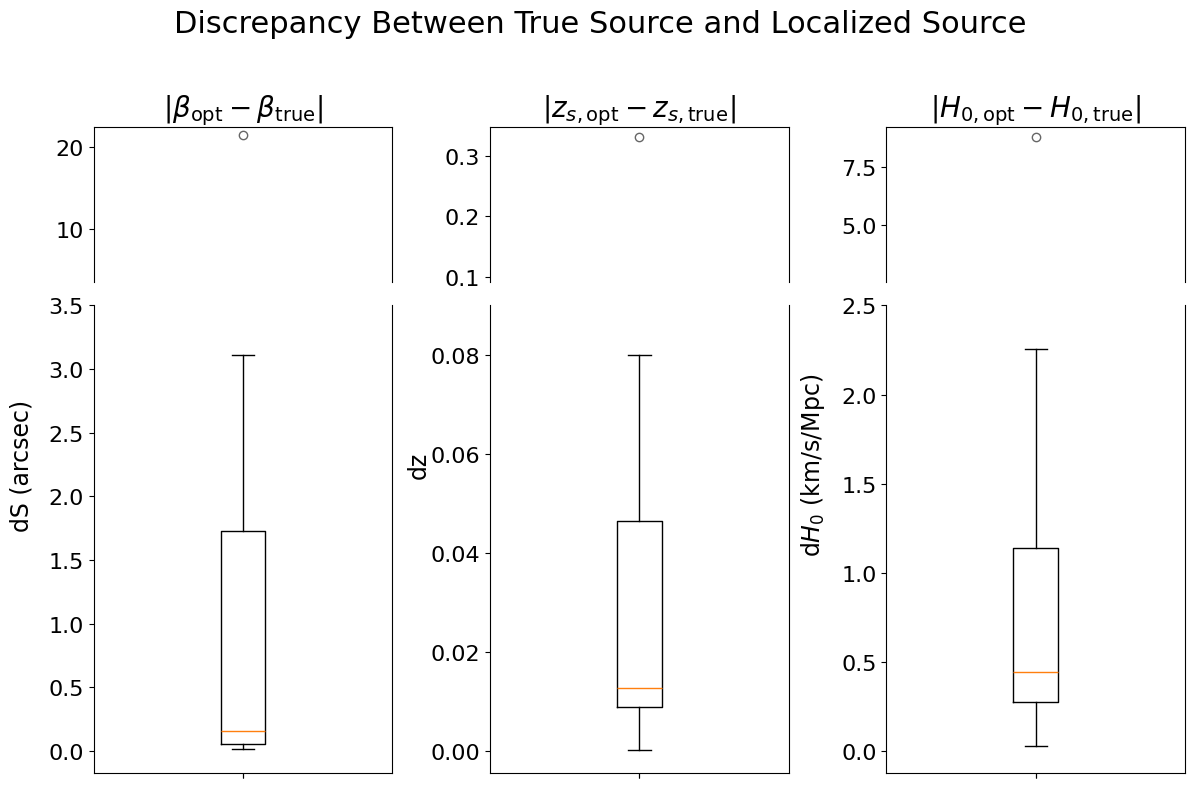

In [29]:
# your three series
dS  = data_zH0['dS']
dz  = data_zH0['dz']
dH0 = data_zH0['dH0']

# ---- choose your exact break points here ----
break_s = 3.5
break_z = 0.09
break_h = 2.5

# how big to draw the little “zig‑zag” in axis coords
d = 0.015

fig, axes = plt.subplots(
    2, 3,
    sharex='col',
    figsize=(12, 8),
    gridspec_kw={'height_ratios': [1, 3]}
)
fig.suptitle('Discrepancy Between True Source and Localized Source', fontsize=22)

# unpack
ax_s_hi, ax_z_hi, ax_h_hi = axes[0]
ax_s_lo, ax_z_lo, ax_h_lo = axes[1]

# common titles
titles = [
    r'$|\beta_{\rm opt}-\beta_{\rm true}|$',
    r'$|z_{s,\rm opt}-z_{s,\rm true}|$',
    r'$|H_{0,\rm opt}-H_{0,\rm true}|$',
]
# data and breaks
series = [dS, dz, dH0]
breaks = [break_s, break_z, break_h]
top_axes = [ax_s_hi, ax_z_hi, ax_h_hi]
bot_axes = [ax_s_lo, ax_z_lo, ax_h_lo]

# ----- top row: only show [break, max] so you see outliers -----
for ax, vals, brk, title in zip(top_axes, series, breaks, titles):
    ax.boxplot(vals, showfliers=True,
               flierprops=dict(marker='o', alpha=0.6))
    ax.set_ylim(brk * 1.005, np.max(vals) * 1.05)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False, labelsize=16)
    ax.set_title(title, fontsize=20)

# ----- bottom row: only show [0, break] so the box fills out -----
#  and set y‑labels on each column
for ax, vals, brk, ylabel in zip(
    bot_axes, series, breaks, ['dS (arcsec)', 'dz', r'd$H_0$ (km/s/Mpc)']
):
    ax.boxplot(vals, showfliers=True,
               flierprops=dict(marker='o', alpha=0.6))
    ax.set_ylim(0-brk*0.05, brk)
    ax.spines['top'].set_visible(False)
    ax.tick_params(labelsize=16)
    ax.set_ylabel(ylabel, fontsize=17)
    ax.yaxis.set_label_coords(-0.2, 0.66)
    ax.tick_params(labelbottom=False)



plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Report images sem2/new/boxplot_z_H0.pdf')
plt.show()


In [41]:
dx_list = data_zH0['dx'].max()
dy_list = data_zH0['dy'].max()
dS_list = data_zH0['dS'].max()
dz_list = data_zH0['dz'].max()
dH0_list = data_zH0['dH0'].max()
print("Mean dx: ", dx_list)
print("Mean dy: ", dy_list)
print("Mean dS: ", dS_list)
print("Mean dz: ", dz_list)
print("Mean dH0: ", dH0_list)

Mean dx:  16.602496169306
Mean dy:  13.504876393551
Mean dS:  21.401508485546
Mean dz:  0.33123393833
Mean dH0:  8.830771174819


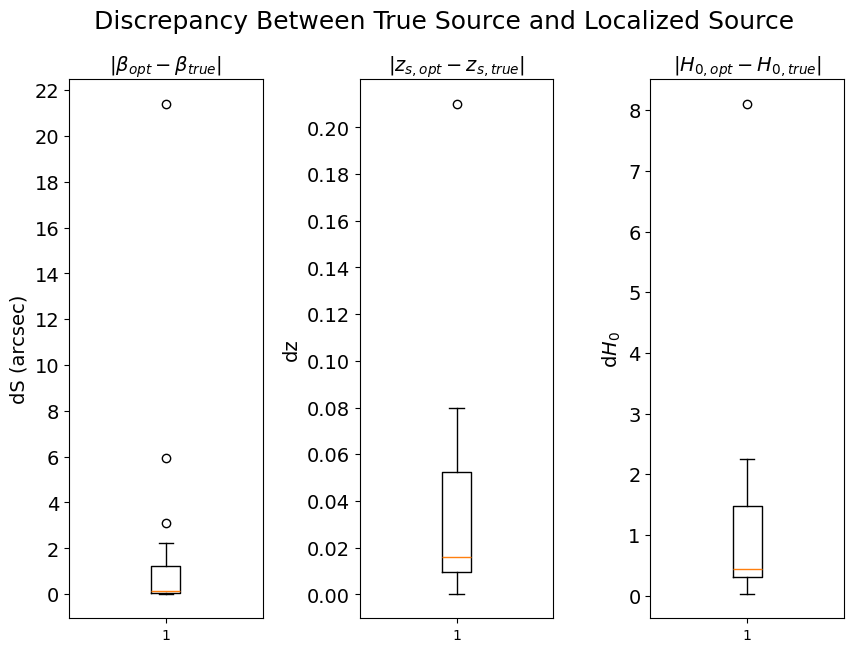

In [ ]:
# create box and whisker plot for unknown H0 data
d_1 = data_zH0['dS']
d_2 = data_zH0['dz']
d_3 = data_zH0['dH0']

fig, axes = plt.subplots(1,3, figsize=(10, 7))
fig.suptitle('Discrepancy Between True Source and Localized Source', fontsize=18)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = axes[0]
ax1.boxplot(d_1)
ax1.set_ylabel('dS (arcsec)', fontsize = 14)
ax1.set_title('$|β_{opt} - β_{true}|$', fontsize = 14)
ax1.set_yticks(np.arange(0, 24, 2))
ax1.tick_params(axis='y', labelsize=14)

ax2 = axes[1]
ax2.boxplot(d_2)
ax2.set_ylabel('dz', fontsize = 14)
ax2.set_title('$|z_{s,opt} - z_{s,true}|$', fontsize = 14)
ax2.set_yticks(np.arange(0, 0.22, 0.02))
ax2.tick_params(axis='y', labelsize=14)

ax3 = axes[2]
ax3.boxplot(d_3)
ax3.set_ylabel('d$H_0$', fontsize = 14)
ax3.set_title('$|H_{0,opt} - H_{0,true}|$', fontsize = 14)
#ax3.set_yticks(np.arange(0, 10, 1))
ax3.tick_params(axis='y', labelsize=14)
plt.show()
